# Titanic Dataset Overview

🧩 The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1,502 out of 2,224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question:
“What sorts of people were more likely to survive?”
using passenger data (i.e., name, age, gender, socio-economic class, etc.).

|📊 Data Dictionary|
|Variable| Description|
|---------|-------------|
|Survival |	0 = No, 1 = Yes|
|Pclass	   |Ticket class; 1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex	    |Male or Female|
|Age	|Age in years|
|SibSp	|# of siblings/spouses aboard the Titanic
|Parch	|# of parents/children aboard the Titanic
|Ticket	|Ticket number
|Fare	|Passenger fare
|Cabin	|Cabin number
|HasCabin	|Created column: 0 = no cabin, 1 = has cabin
|Embarked	|Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton


## 📝 Variable Notes
Pclass – A proxy for socio-economic status (SES):

- 1st = Upper
- 2nd = Middle
- 3rd = Lower
- Age – Fractional if less than 1; if estimated, represented as xx.5.

SibSp – Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch – Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore Parch = 0 for them.



In [1004]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"/Users/sa8/Desktop/Titanic/csv_data/train.csv"

df = pd.read_csv(file_path)

df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1005]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1006]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1007]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1008]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1009]:
# Handling the missing data

# Fill missing 'Age' values with the median age based on passenger class ('Pclass') and gender ('Sex')
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Create a new column 'HasCabin', where 1 means the passenger has a cabin, and 0 means no cabin info
df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Fill missing 'Embarked' values with the most common port (mode) where passengers boarded
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#Since we have the HasCabin column lets drop the Cabin column
df = df.drop(columns=["Cabin"])



/var/folders/w7/jd1z45j96837md4q7byfwykm0000gn/T/ipykernel_79631/3332487513.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


Handling Missing Data

- Age – Estimating Missing Ages Thoughtfully
  - Instead of dropping these rows, estimate the missing ages by calculating the median age for groups based on 'Pclass' and 'Sex'. This approach maintains the dataset's integrity while providing reasonable estimates.​

- Cabin – Creating a New Feature for Cabin Information
  - Rather than attempting to fill in these missing cabin numbers, I created a new binary feature, such as 'HasCabin', indicating whether a cabin number is present. This can help capture the potential significance of having a cabin assignment without relying on the specific cabin details.​

- Embarked – Filling in Missing Embarkation Points
  - Fill these in with the most common embarkation point among passengers, ensuring consistency without significantly impacting the dataset's integrity.​



In [1010]:
#How the data looks after handling the missing data 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64


- Cabin still has 687 missing as I created a new 'HasCabin' feature to capture the missingness 

In [1011]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


- Fare is strongly right-skewed (because a few very high prices pull the mean up a lot — you can see max fare is over 512, while median fare is just 14.45).
- Age is only slightly right-skewed, because the mean is just a little higher than the median (people lived into 70s–80s, but most were younger).
- HasCabin is basically binary (0 or 1), but since most people don't have a cabin (0), it's also right-skewed in a way.

---

# Univariate Analysis

In [1012]:
df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


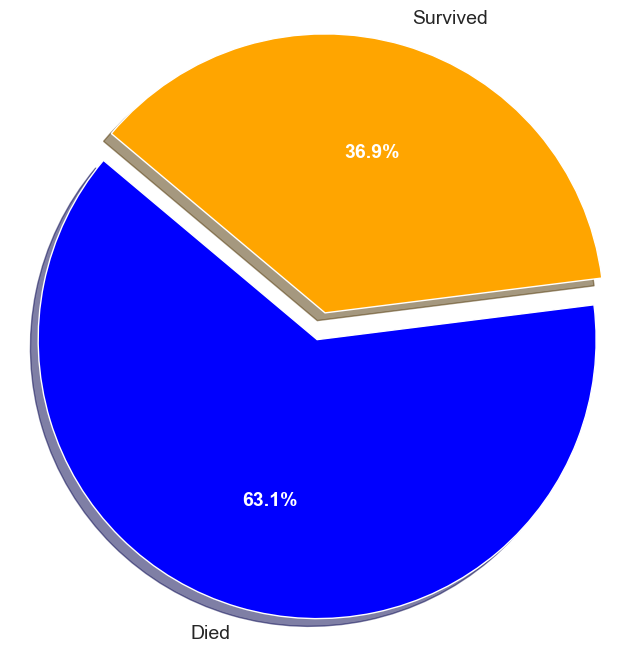

In [1013]:
import matplotlib.pyplot as plt

# Define the data
labels = ['Died', 'Survived']
sizes = [549, 321]
colors = ['Blue', 'Orange']
explode = (0.05, 0.05)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart and capture the texts
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    textprops={'fontsize': 14}
)

# Customize the percentage text (autotexts)
for autotext in autotexts:
    autotext.set_color('white')     # Set text color to white
    autotext.set_fontweight('bold') # Set text weight to bold

# Make sure pie is a circle
ax.axis('equal')

# Show the plot
plt.show()


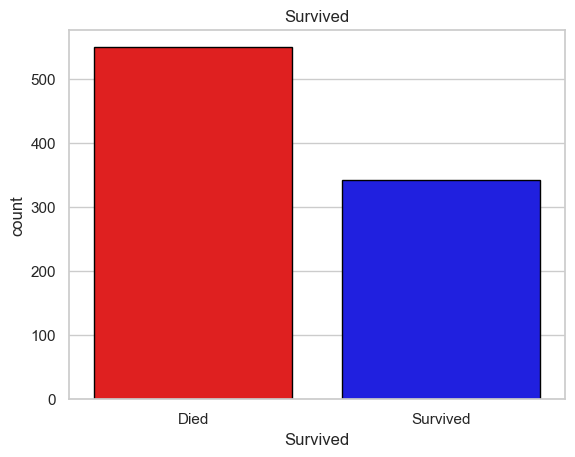

In [975]:
palette = {0: 'red', 1: 'blue'}
sns.countplot(df, x= "Survived", hue="Survived", edgecolor="black", legend= False, palette= palette)
plt.xticks(ticks=[0, 1], labels=["Died", "Survived"])
plt.title("Survived")
plt.show()


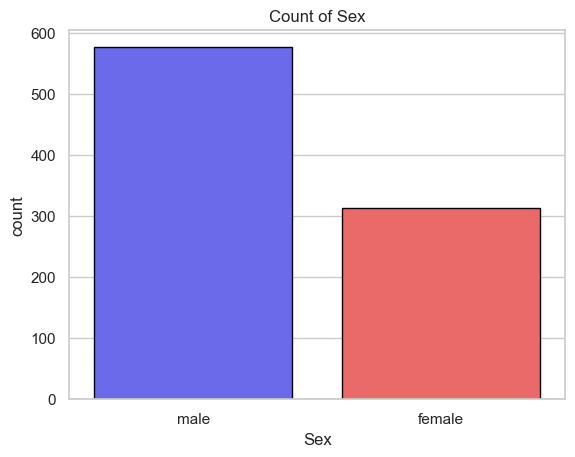

In [1014]:

sns.countplot(df, x='Sex', hue= 'Sex', edgecolor = "black",palette= "seismic")
sns.set(style="whitegrid")
plt.title('Count of Sex')
plt.show()





### There are almost the double amount of males in this dataset 

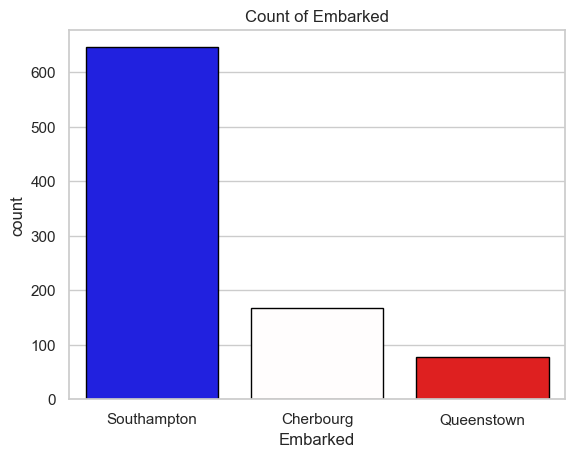

In [977]:
sns.countplot(df, x='Embarked', hue= 'Embarked', edgecolor= "black",palette='seismic')
plt.title('Count of Embarked')
plt.xticks(ticks=[0, 1, 2], labels=["Southampton", "Cherbourg", "Queenstown"])
plt.show()

### The highest count here being Southampton
 - Southampton englad was the Titanic's primary port of embarkation, where the voyage began.

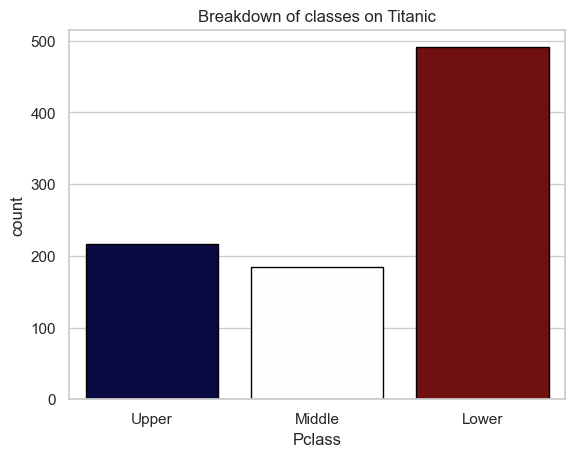

In [978]:
sns.countplot(df, x="Pclass",hue="Pclass", edgecolor="black", legend= False, palette='seismic')
plt.xticks(ticks=[0, 1, 2], labels=["Upper", "Middle", "Lower"])
plt.title("Breakdown of classes on Titanic")
plt.show()

### There was mostly Lower class on the Titanic 

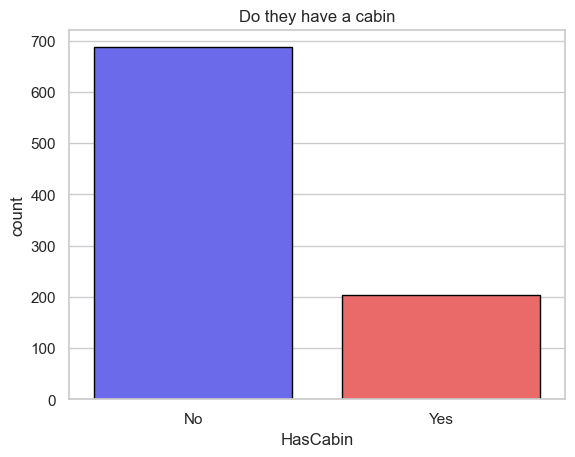

In [1015]:
sns.countplot(df, x= "HasCabin", edgecolor= "Black", hue="HasCabin", legend=False, palette='seismic')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.title("Do they have a cabin")
plt.show()

### Most people that was on the Titanic did not have a cabin 

---

# Bivariate Analysis

In [980]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'HasCabin'],
      dtype='object')

In [1016]:

# Define the bin edges and corresponding labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'AgeGroup' with binned age categories
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [1018]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,21-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,11-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S,0,21-30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,21-30


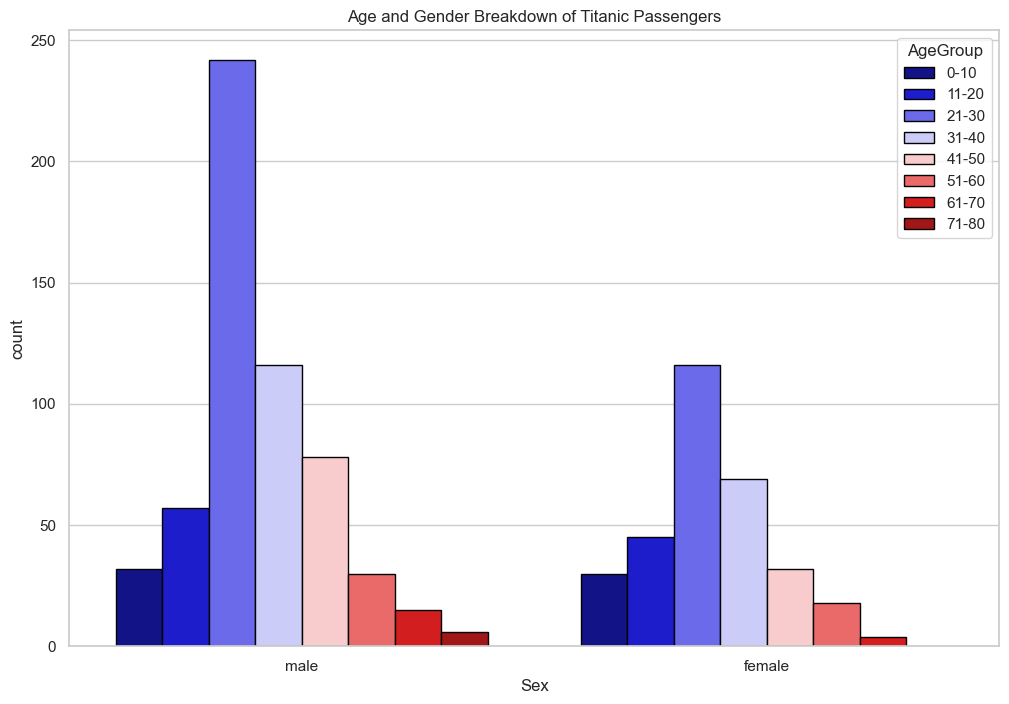

In [1019]:
plt.figure(figsize = (12,8))
sns.countplot(df, x="Sex", hue="AgeGroup" , edgecolor= "black", palette= "seismic")
plt.title("Age and Gender Breakdown of Titanic Passengers")
plt.show()







### We see a younger people dominate the age set for males and females 

- Popular age groups we see for males and females is 21-30 
- the count of people from 31-40 on decreases as age increases 

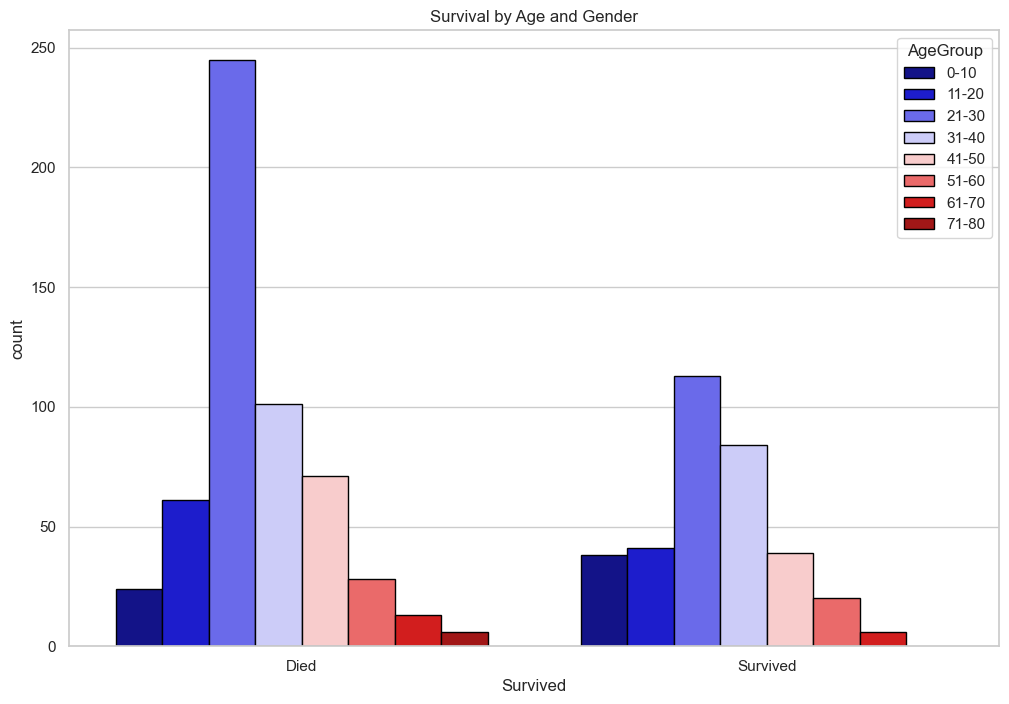

In [1020]:
plt.figure(figsize = (12,8))
sns.countplot(df, x="Survived", hue="AgeGroup" , edgecolor= "black", palette= "seismic")
plt.xticks(ticks=[0, 1], labels=["Died", "Survived"])
plt.title("Survival by Age and Gender")
plt.show()

### The popular age group of 21-30 have the most in terms of people dying and surving 

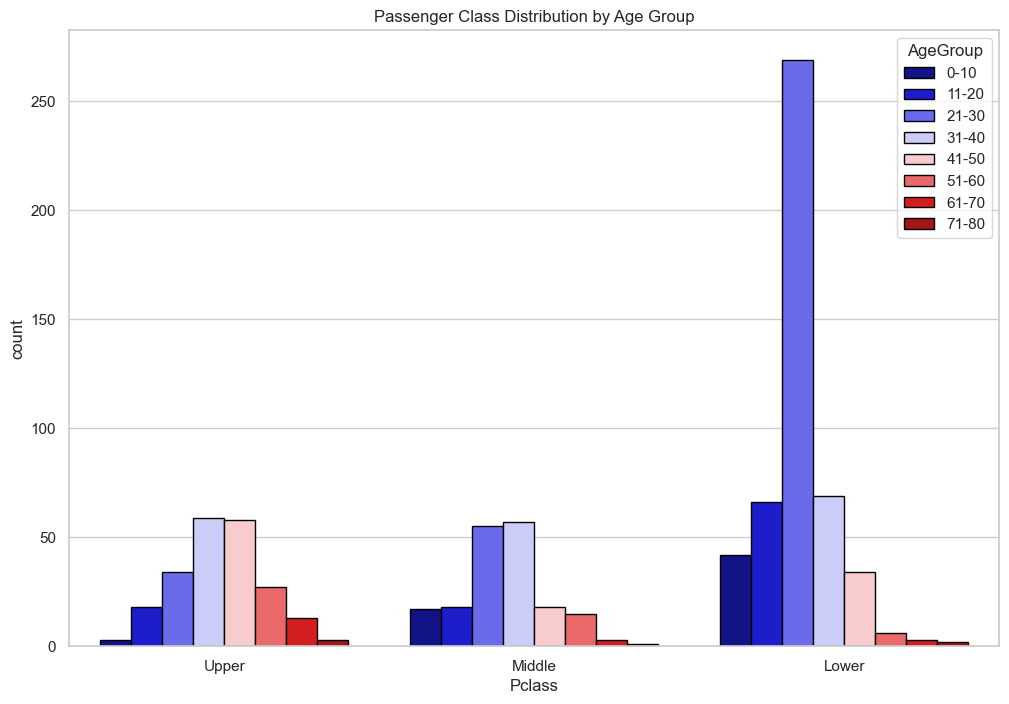

In [985]:
plt.figure(figsize = (12,8))
sns.countplot(df, x= "Pclass", hue="AgeGroup", edgecolor ="Black", palette= "seismic")
plt.title("Passenger Class Distribution by Age Group")
plt.xticks(ticks=[0, 1, 2], labels=["Upper", "Middle", "Lower"])
plt.show()

### We see 21-30 year olds domniate the lower class. 
### As the classes increase to middle and upper, the age in those classes also increase 

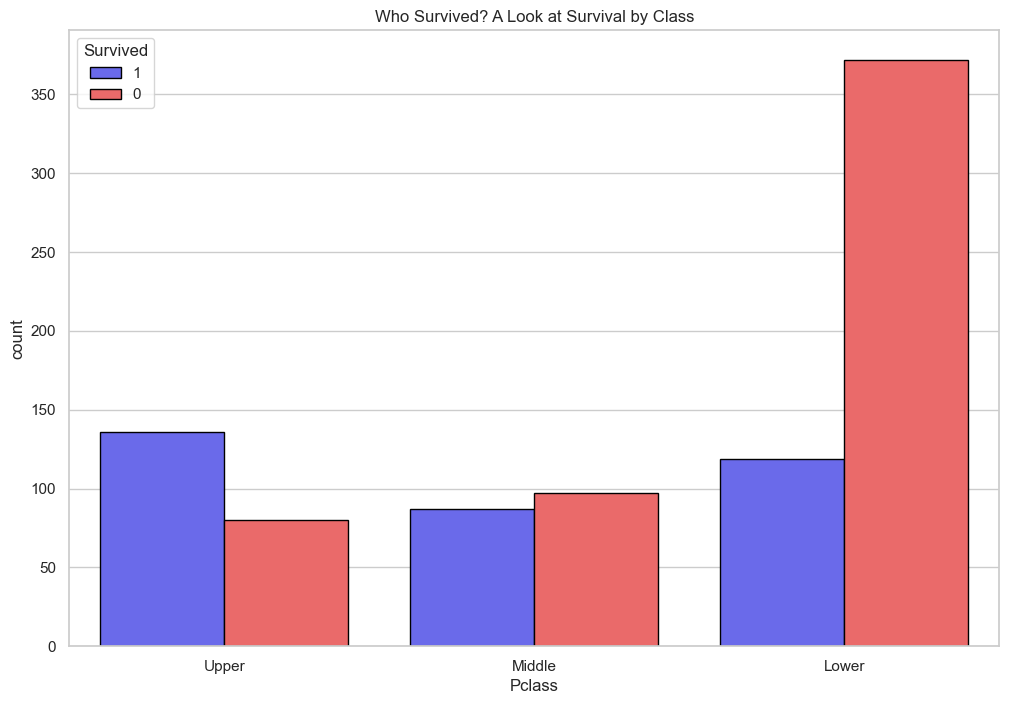

In [986]:
plt.figure(figsize = (12,8))
sns.countplot(df, x= "Pclass", hue="Survived", edgecolor ="Black", palette= "seismic",hue_order=[1,0])
plt.xticks(ticks=[0, 1, 2], labels=["Upper", "Middle", "Lower"])
plt.title("Who Survived? A Look at Survival by Class")
plt.show()

### Tragically, most of those who lost their lives were third-class passengers, who represented the largest group aboard the Titanic.

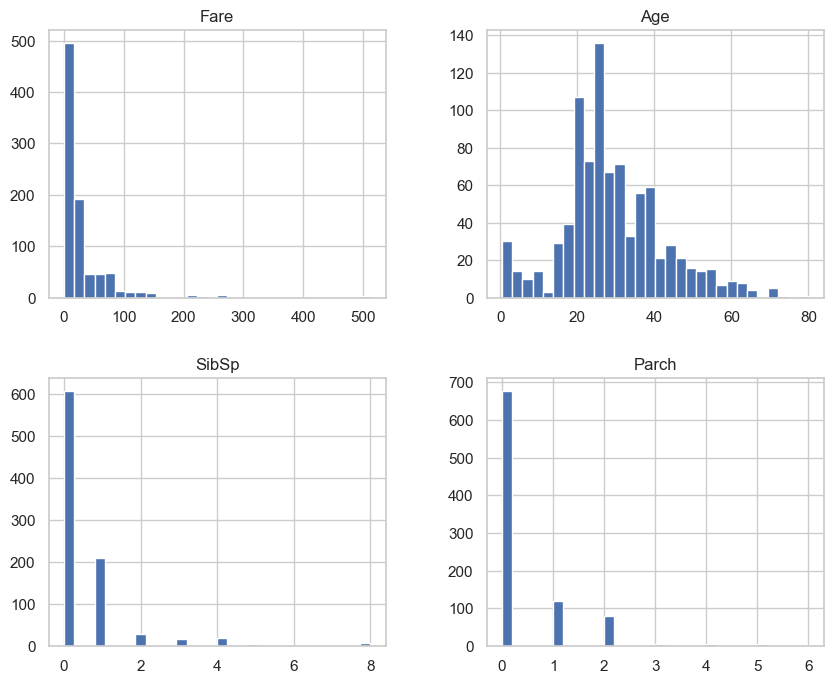

In [987]:
df[['Fare', 'Age', 'SibSp', 'Parch']].hist(bins=30, figsize=(10,8))
plt.show()



- Fare: 
   - Think of the ticket prices as mostly clustered at the affordable end, with a long stretch of increasingly expensive tickets hinting at a few very wealthy travelers who splurged on their passage. 
- Age: 
   - The ship was filled with young adults in their twenties and thirties, forming the bulk of the passenger population. We also saw a gentle tapering off towards older ages, with just a sprinkle of children and more senior individuals among the travelers.
- SibSp: 
   - It seems most people journeyed without siblings or spouses by their side. However, there were noticeable small groups of people traveling with one or two close family members, and only a handful of larger sibling or spousal groups.
- Parch: 
  - Even more so than with siblings or spouses, the vast majority of passengers traveled without their parents or children accompanying them. We saw only a smattering of small families with one or two parents or children, and very rarely a larger family unit.

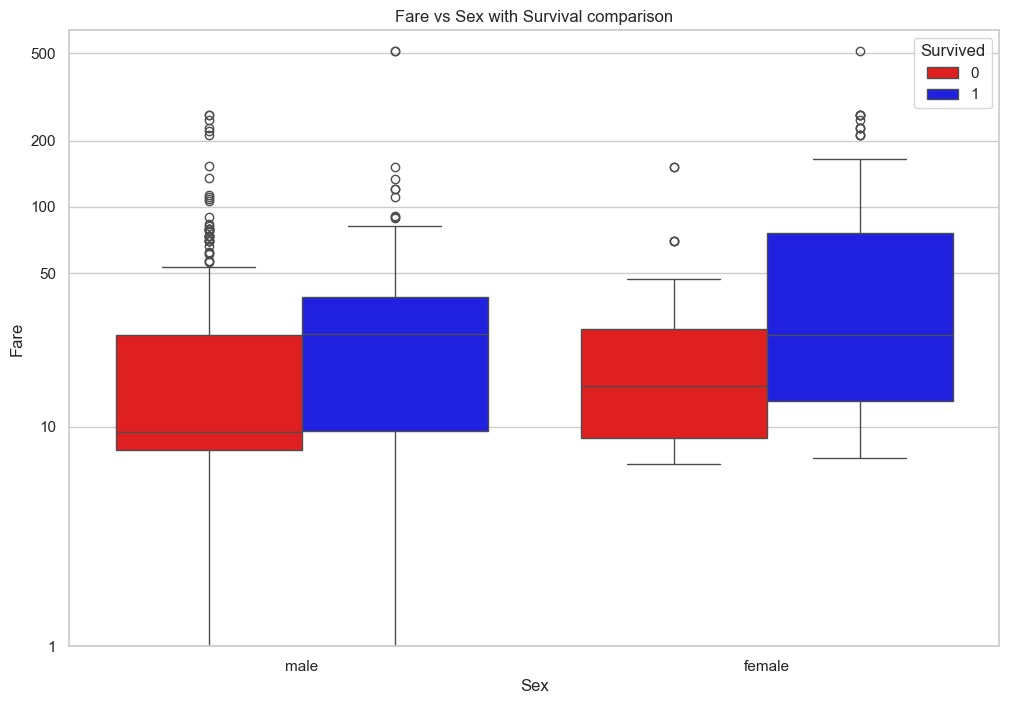

In [988]:

plt.figure(figsize=(12, 8))
sns.boxplot(data= df, x= "Sex" , y="Fare", hue= "Survived" , palette=palette)
plt.title("Fare vs Sex with Survival comparison")
# Set the y-axis to a logarithmic scale for better readability of skewed fare values
plt.yscale("log")

# Define specific y-axis tick positions to show (cannot include 0 in log scale)
tick_values = [1, 10, 50, 100, 200, 500]

# Set the y-axis ticks to these values and label them as strings (e.g., "10", "50", etc.)
plt.yticks(tick_values, [str(v) for v in tick_values])
plt.show()

- For both male and females the lower fares had more death. 
- Females paid higher prices overall. 
- Males having the most outliers

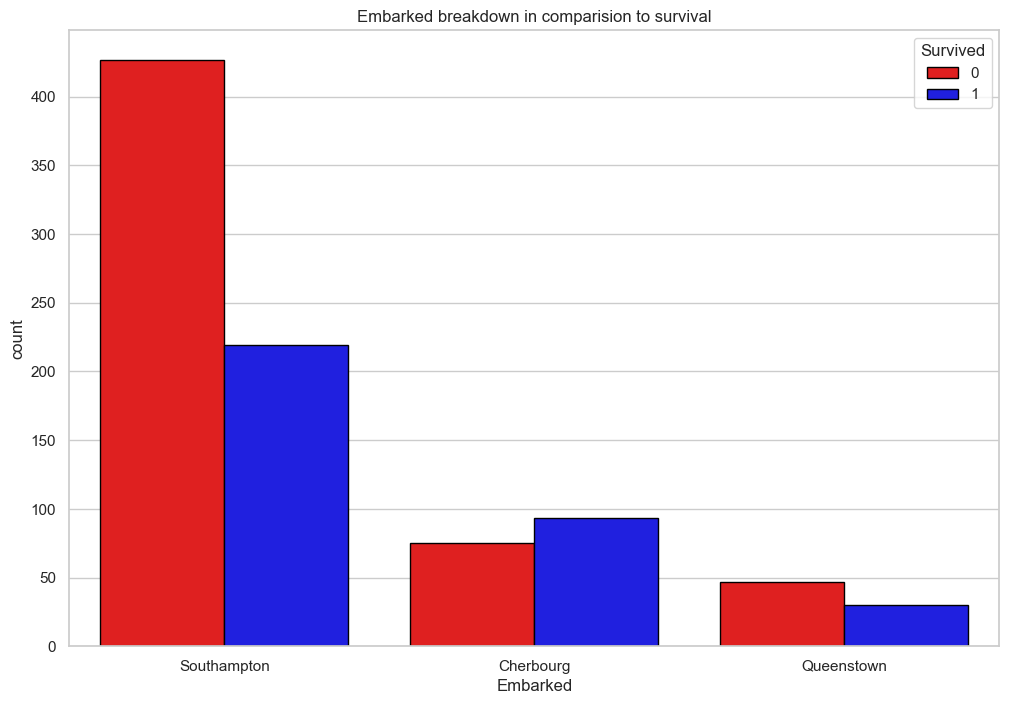

In [989]:
plt.figure(figsize = (12,8))
plt.xticks(ticks=[0, 1, 2], labels=["Southampton", "Cherbourg", "Queenstown"])
plt.title("Embarked breakdown in comparision to survival")
sns.countplot(df,x= "Embarked", hue="Survived", palette=palette, edgecolor= "black")
plt.show()

- We see more death with people coming from Southampton(where the voyage started)
- We also see the most survivors coming from there but most of the people overall came from Southampton
- Cherbourg Seen the most survivors from that Embark

## **While Looking through this data, My early Hypothesis is that, females, are customers that have/had higher fares are/were more likely to survive!**

---

# Multivariate Analysis

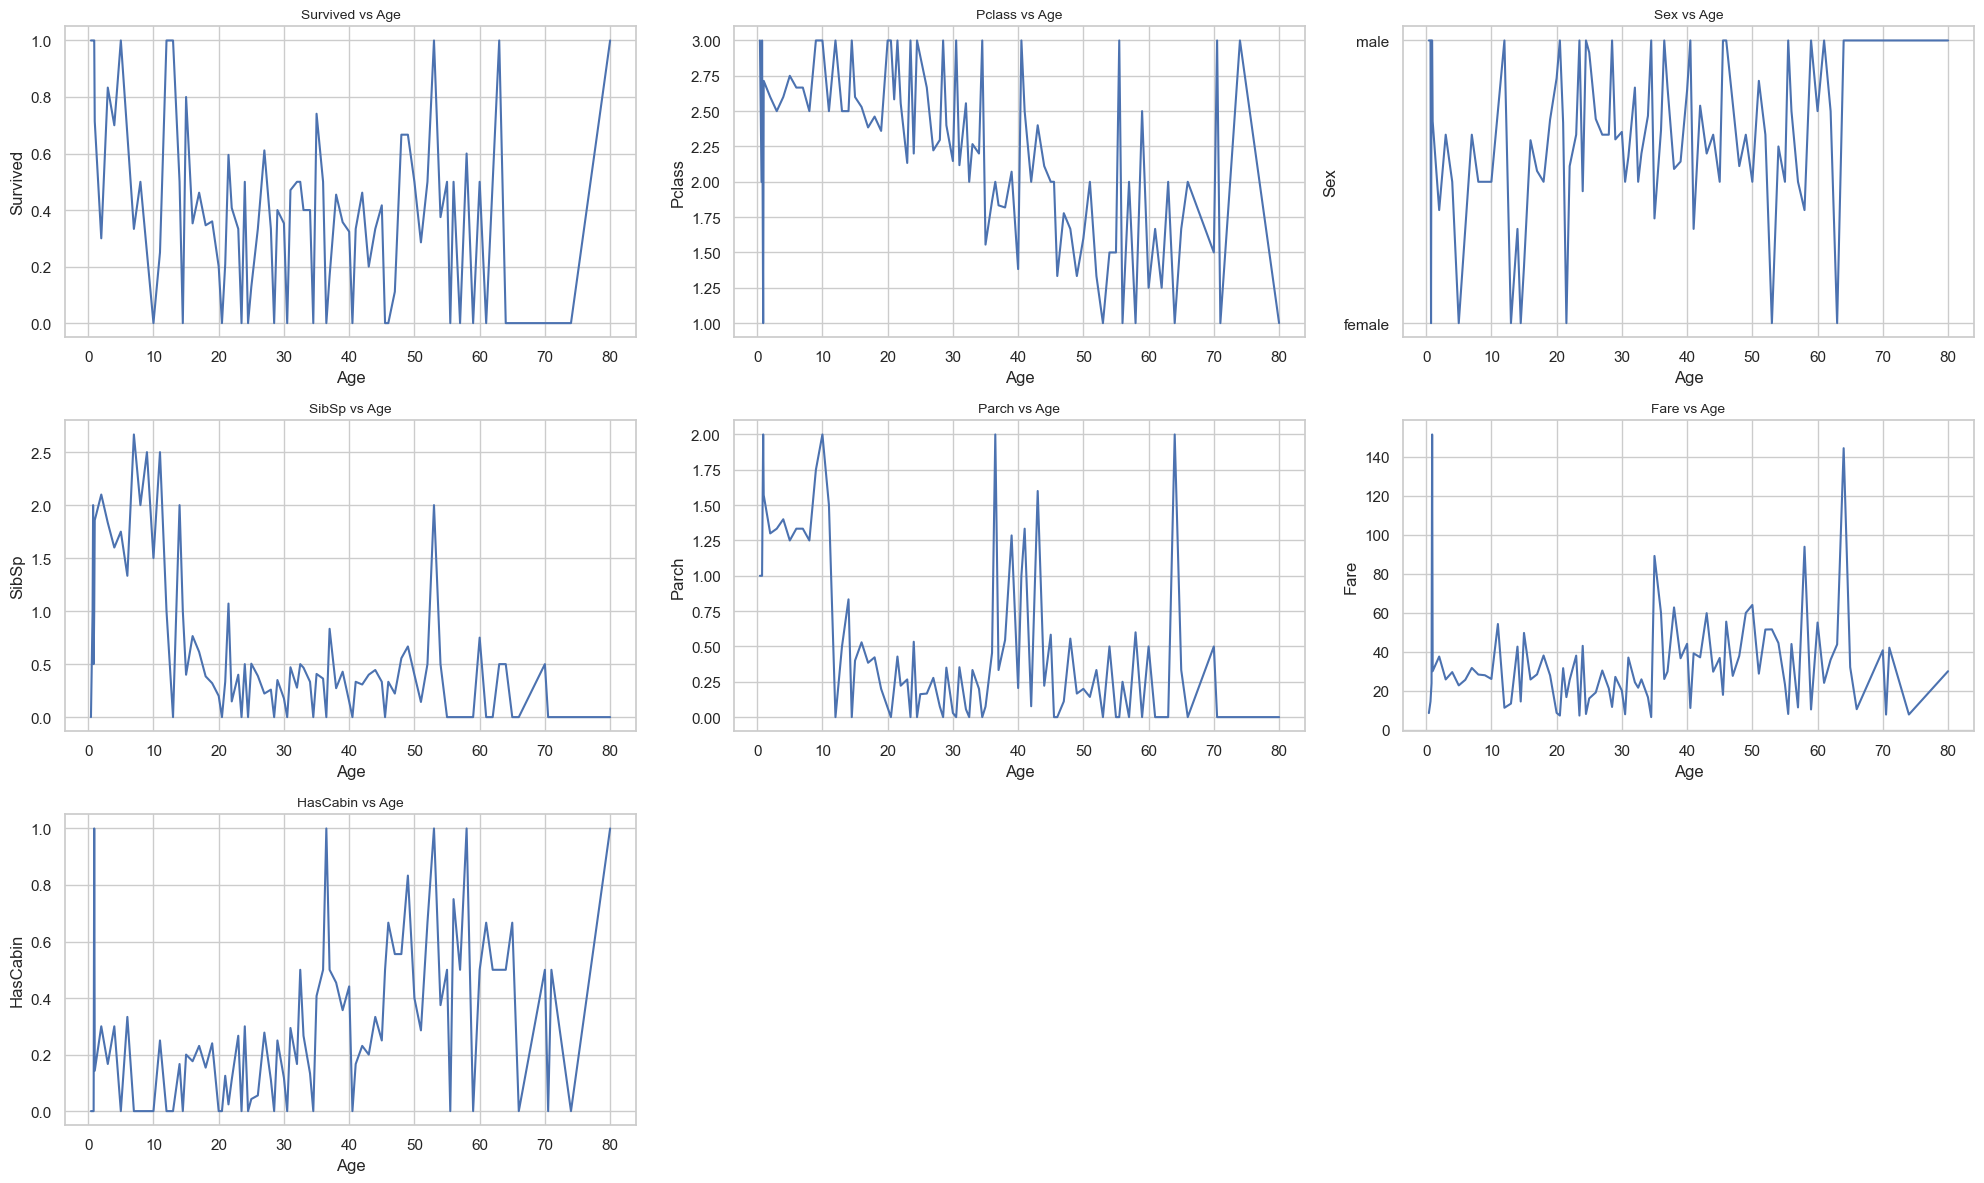

In [990]:
# Define the features to plot against Age
features = [
    'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 
    'Fare', 'HasCabin', 
]

# Create a 3x3 grid of subplots with a total figure size
fig, axes = plt.subplots(3, 3, figsize=(20, 12))  # 3 rows x 3 columns of plots

# Flatten the 2D array of axes into a 1D list for easy indexing
axes = axes.flatten()

# Loop through each feature and its index
for idx, feature in enumerate(features):
    ax = axes[idx]  # Get the corresponding subplot axis
    # Create a line plot of Age vs. the current feature
    sns.lineplot(data=df, x="Age", y=feature, ax=ax, errorbar=None)
    # Set the title of the subplot
    ax.set_title(f'{feature} vs Age', fontsize=10)
    # Label the x-axis and y-axis
    ax.set_xlabel("Age")
    ax.set_ylabel(feature)

# If there are extra subplots that aren't needed (e.g., 9 slots but only 7 features), remove them
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])  # Delete the unused axes

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display all the subplots
plt.show()


- Survived vs Age: 
   - The proportion of survivors varied across different age groups, showing no simple linear relationship.
- Pclass vs Age: 
   - Younger passengers were distributed across all classes, while older passengers showed a tendency towards upper and middle classes.
- Sex vs Age: 
   - The gender balance fluctuated across different age ranges of the passengers.
- SibSp vs Age: 
   - The average number of siblings/spouses aboard peaked in younger age groups, likely representing families.
- Parch vs Age:
   - Similarly, the average number of parents/children aboard was higher for certain younger age ranges.
- Fare vs Age:
  - Passengers of specific ages paid notably higher fares, suggesting a concentration of higher classes at those ages.
- HasCabin vs Age: 
   - The proportion of passengers with recorded cabin information generally increased with age.

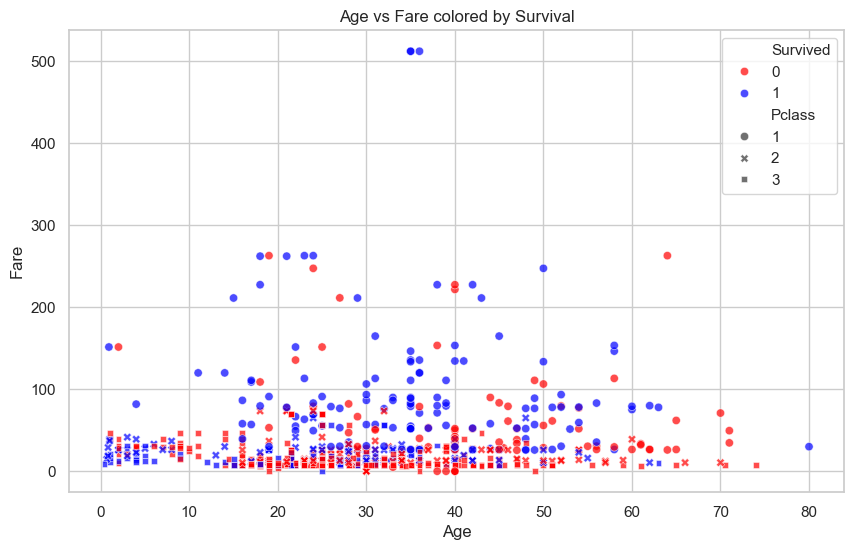

In [991]:
plt.figure(figsize=(10, 6))
palette = {0: 'red', 1: 'blue'}
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', style='Pclass', palette=palette, alpha=0.7)
plt.title("Age vs Fare colored by Survival")
plt.show()

- Passengers with higher fares, who were typically in higher classes, had a better chance of survival. 
- While age doesn't show a clear direct link to survival, the plot highlights the strong connection between fare, class, and the likelihood of surviving the Titanic disaster. The different shapes further emphasize how passenger class relates to the fare paid.

In [1024]:

# Convert 'Sex' and 'Embarked' to numeric first
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
#Dropping this for the correlation heat map
df_encoded = df_encoded.drop(columns=['Name', 'Ticket', 'PassengerId','AgeGroup'])


df_encoded.corr()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
Survived,1.000000,-0.338481,0.543351,-0.059579,-0.035322,0.081629,0.257307,0.106811,0.316912
Pclass,-0.338481,1.000000,-0.131900,-0.413583,0.083081,0.018443,-0.549500,0.045702,-0.725541
Sex,0.543351,-0.131900,1.000000,-0.102706,0.114631,0.245489,0.182333,0.116569,0.140391
Age,-0.059579,-0.413583,-0.102706,1.000000,-0.249854,-0.175526,0.122692,-0.056434,0.277022
SibSp,-0.035322,0.083081,0.114631,-0.249854,1.000000,0.414838,0.159651,-0.059961,-0.040460
Parch,0.081629,0.018443,0.245489,-0.175526,0.414838,1.000000,0.216225,-0.078665,0.036987
Fare,0.257307,-0.549500,0.182333,0.122692,0.159651,0.216225,1.000000,0.062142,0.482075
Embarked,0.106811,0.045702,0.116569,-0.056434,-0.059961,-0.078665,0.062142,1.000000,0.013774
HasCabin,0.316912,-0.725541,0.140391,0.277022,-0.040460,0.036987,0.482075,0.013774,1.000000


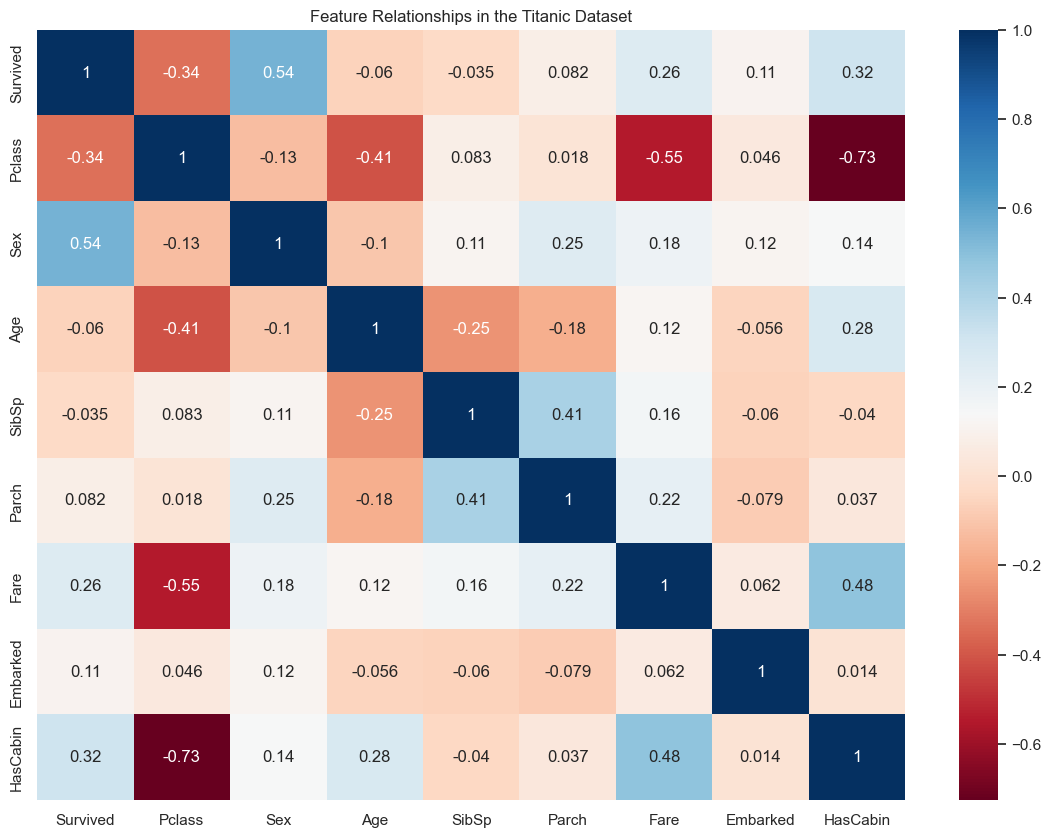

In [1025]:
plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap= 'RdBu')
plt.title("Feature Relationships in the Titanic Dataset")
plt.show()

- Higher class (Pclass) and being female (Sex) strongly correlate with a higher chance of survival (Survived). The red/blue colors for these relationships with 'Survived' are quite distinct.
- Passenger class (Pclass) is strongly linked to the fare paid (Fare) and whether cabin information was available (HasCabin). Lower classes paid less and were less likely to have cabin details.
- The number of family members aboard (SibSp and Parch) are somewhat related to each other, suggesting families traveled together.

<Figure size 1400x1000 with 0 Axes>

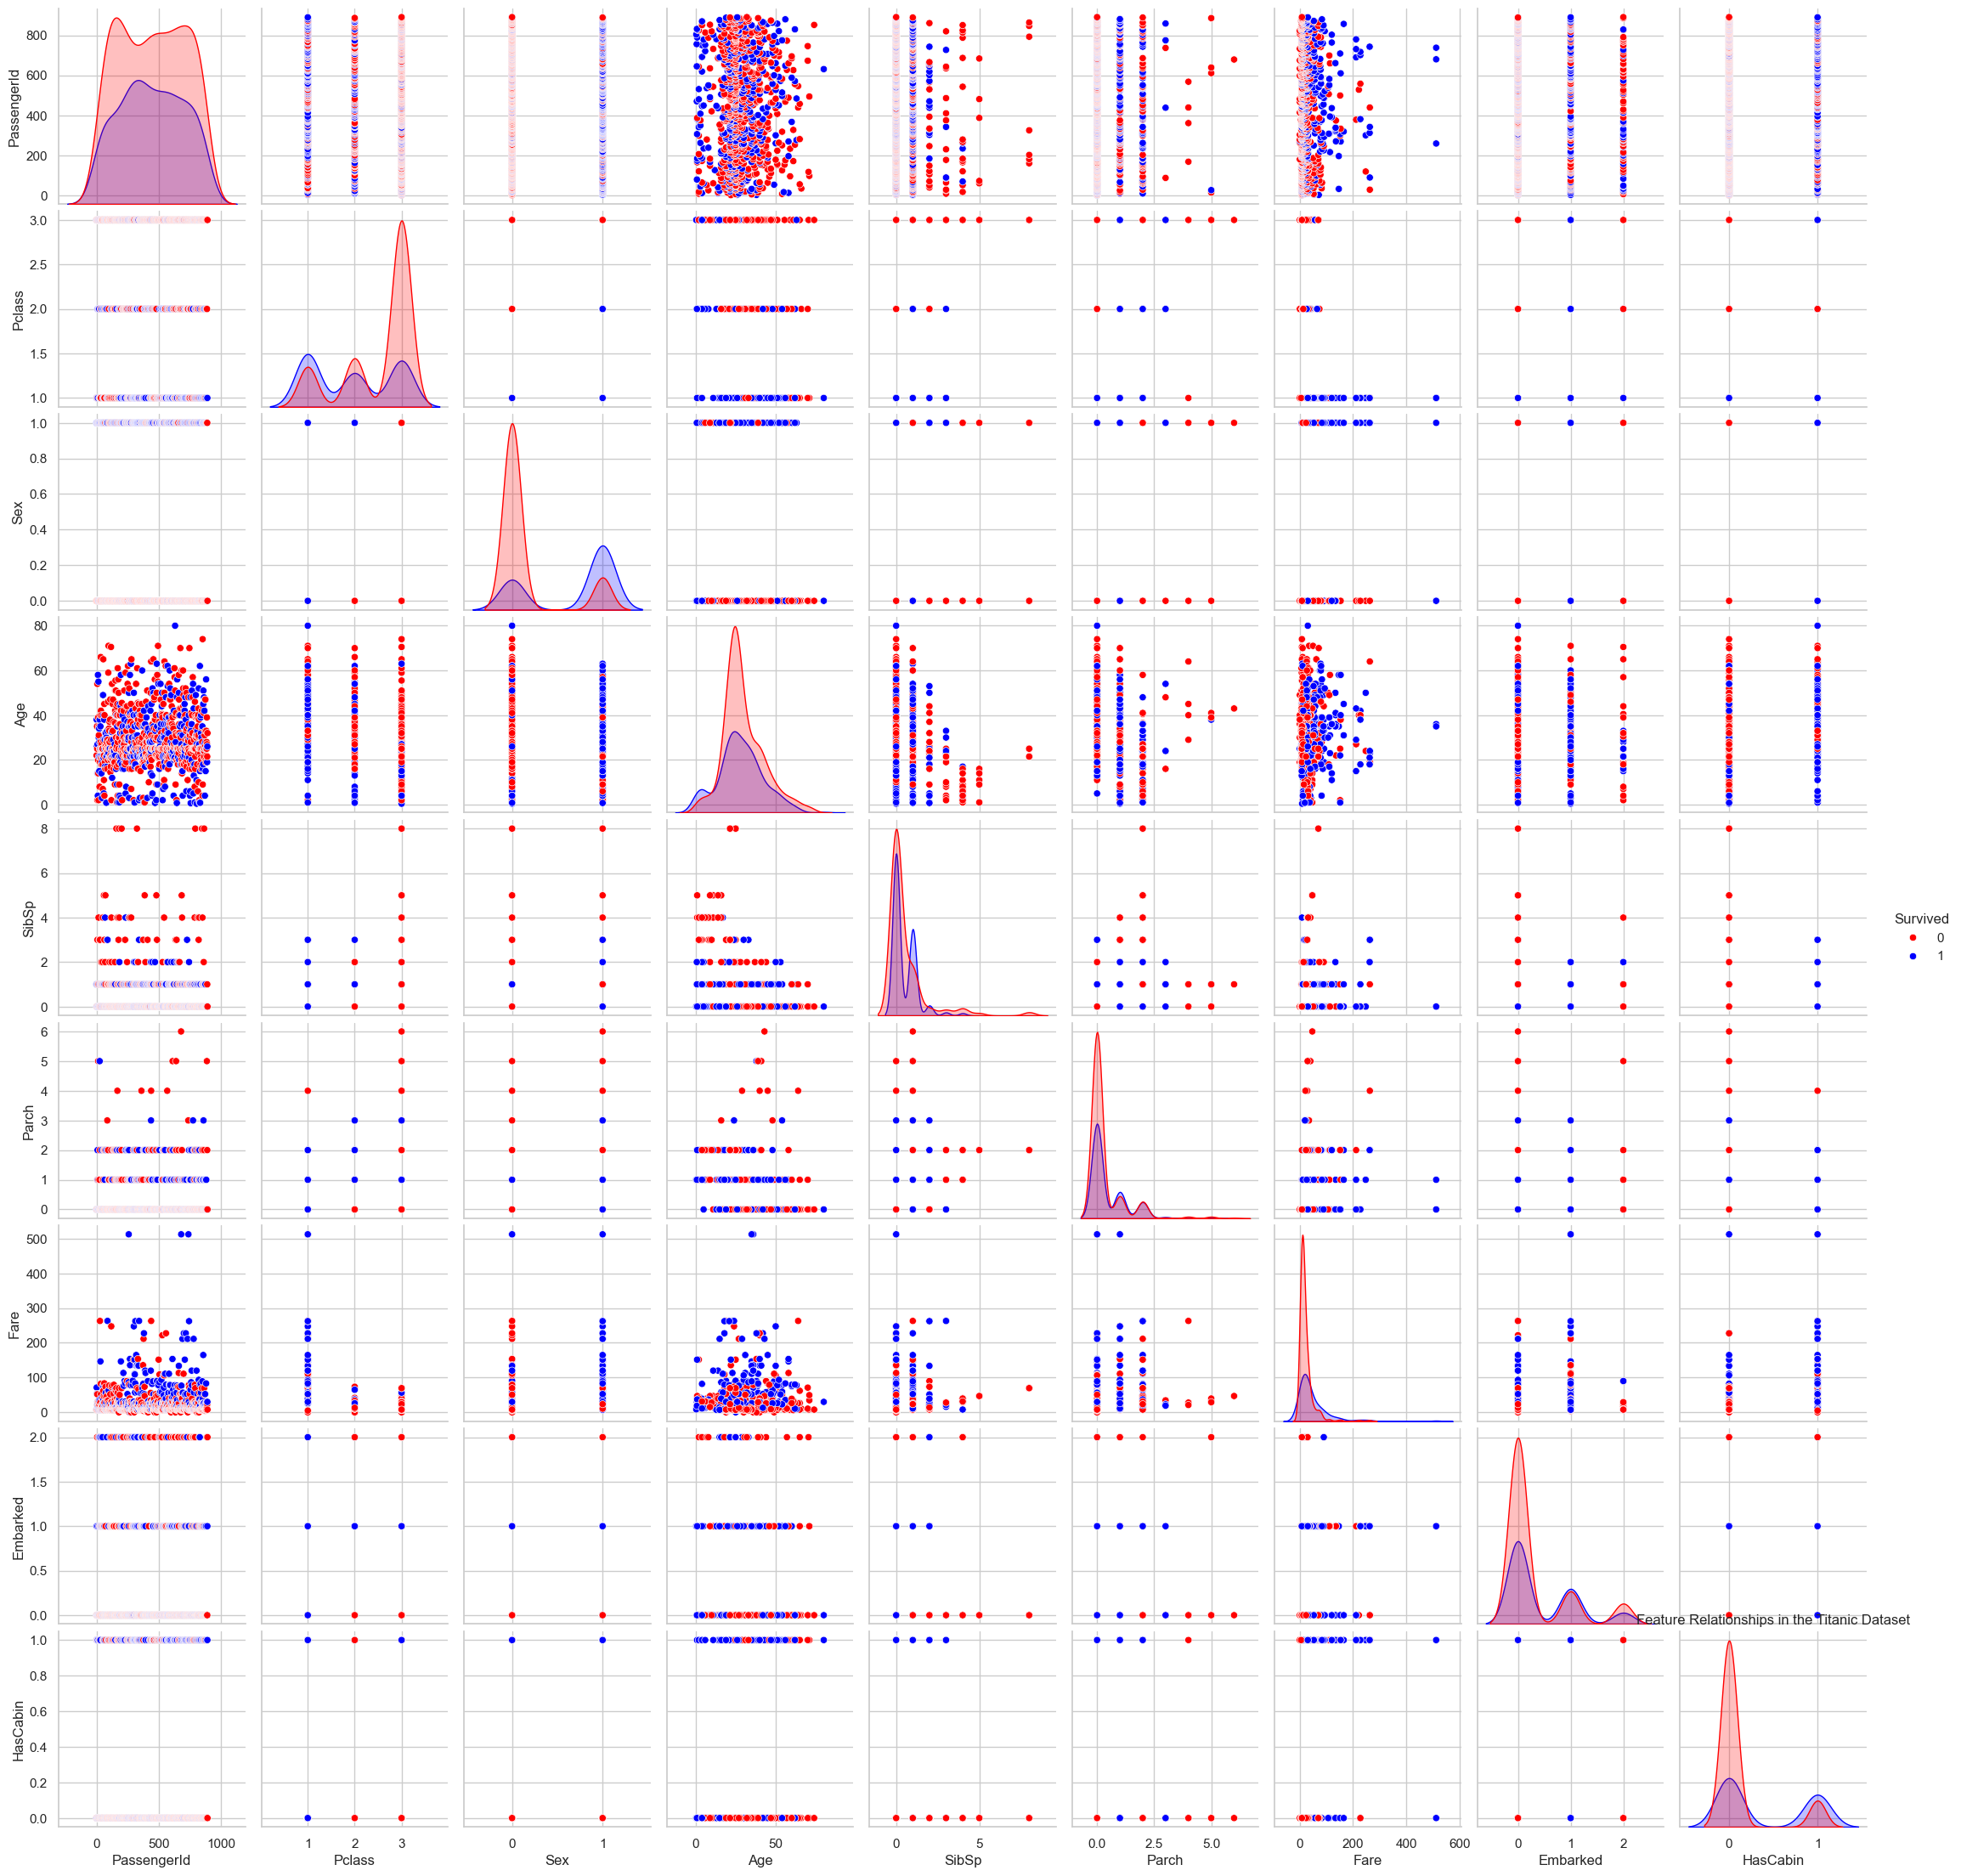

In [ ]:
plt.figure(figsize=(14,10))
sns.pairplot(df_encoded, hue= "Survived", palette=palette)

plt.show()

## Pair Plot Thoughts 
- Higher Fare Correlates with Survival: 
  - Passengers who paid higher fares had a higher chance of survival (more blue points at higher 'Fare' values).
- Lower Pclass Correlates with Survival: 
  - Passengers in higher classes (1:Upper, 2:Middle, 3:lower) had a higher chance of survival (more blue points at lower 'Pclass' values).
- Females Had a Higher Survival Rate: 
  - The 'Sex' plots show a clear difference in survival. The cluster of points at 'Sex' = 1 (female) is predominantly blue (survived), indicating a higher survival rate for females.
- Age Distribution Shows Some Survival Patterns: 
  - The distribution of 'Age' for survivors (blue) differs from those who died, suggesting that certain age groups might have had a better chance of survival.
- Higher SibSp and Parch Might Correlate with Lower Survival: 
  - Passengers with larger numbers of siblings/spouses ('SibSp') or parents/children ('Parch') aboard might have had a slightly lower chance of survival (more red points at higher 'SibSp' and 'Parch' values).